In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

df_student = pd.read_csv("student-mat.csv" ,sep=';')

Exploring the dataset

In [3]:
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df_student.shape

(395, 33)

In [5]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

There are no null values in the dataset then we can move further with our evaluation

In [6]:
df_student.nunique() 

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [7]:
df_student.duplicated().sum()

np.int64(0)

In [8]:
df_student.describe(exclude = 'object')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
df_student.describe(include = 'object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [10]:
df_student['G3'].value_counts().sort_index()

G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: count, dtype: int64

In [11]:
df_student['school'].value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

In [12]:
df_student.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

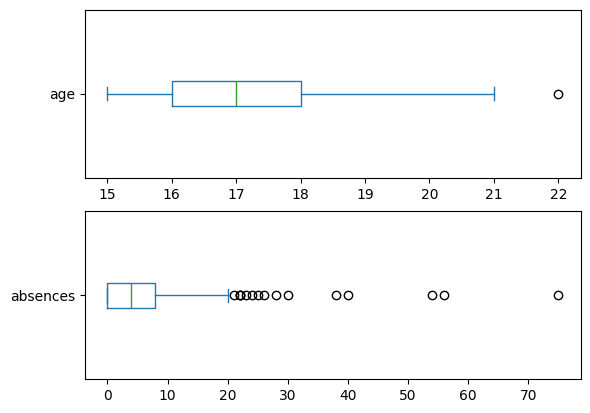

In [13]:
plt.Figure(figsize=(12 , 4))
plt.subplot(2,1,1)
df_student['age'].plot(kind='box' , vert =False)
plt.subplot(2,1,2)
df_student['absences'].plot(kind='box' , vert = False)
plt.show()

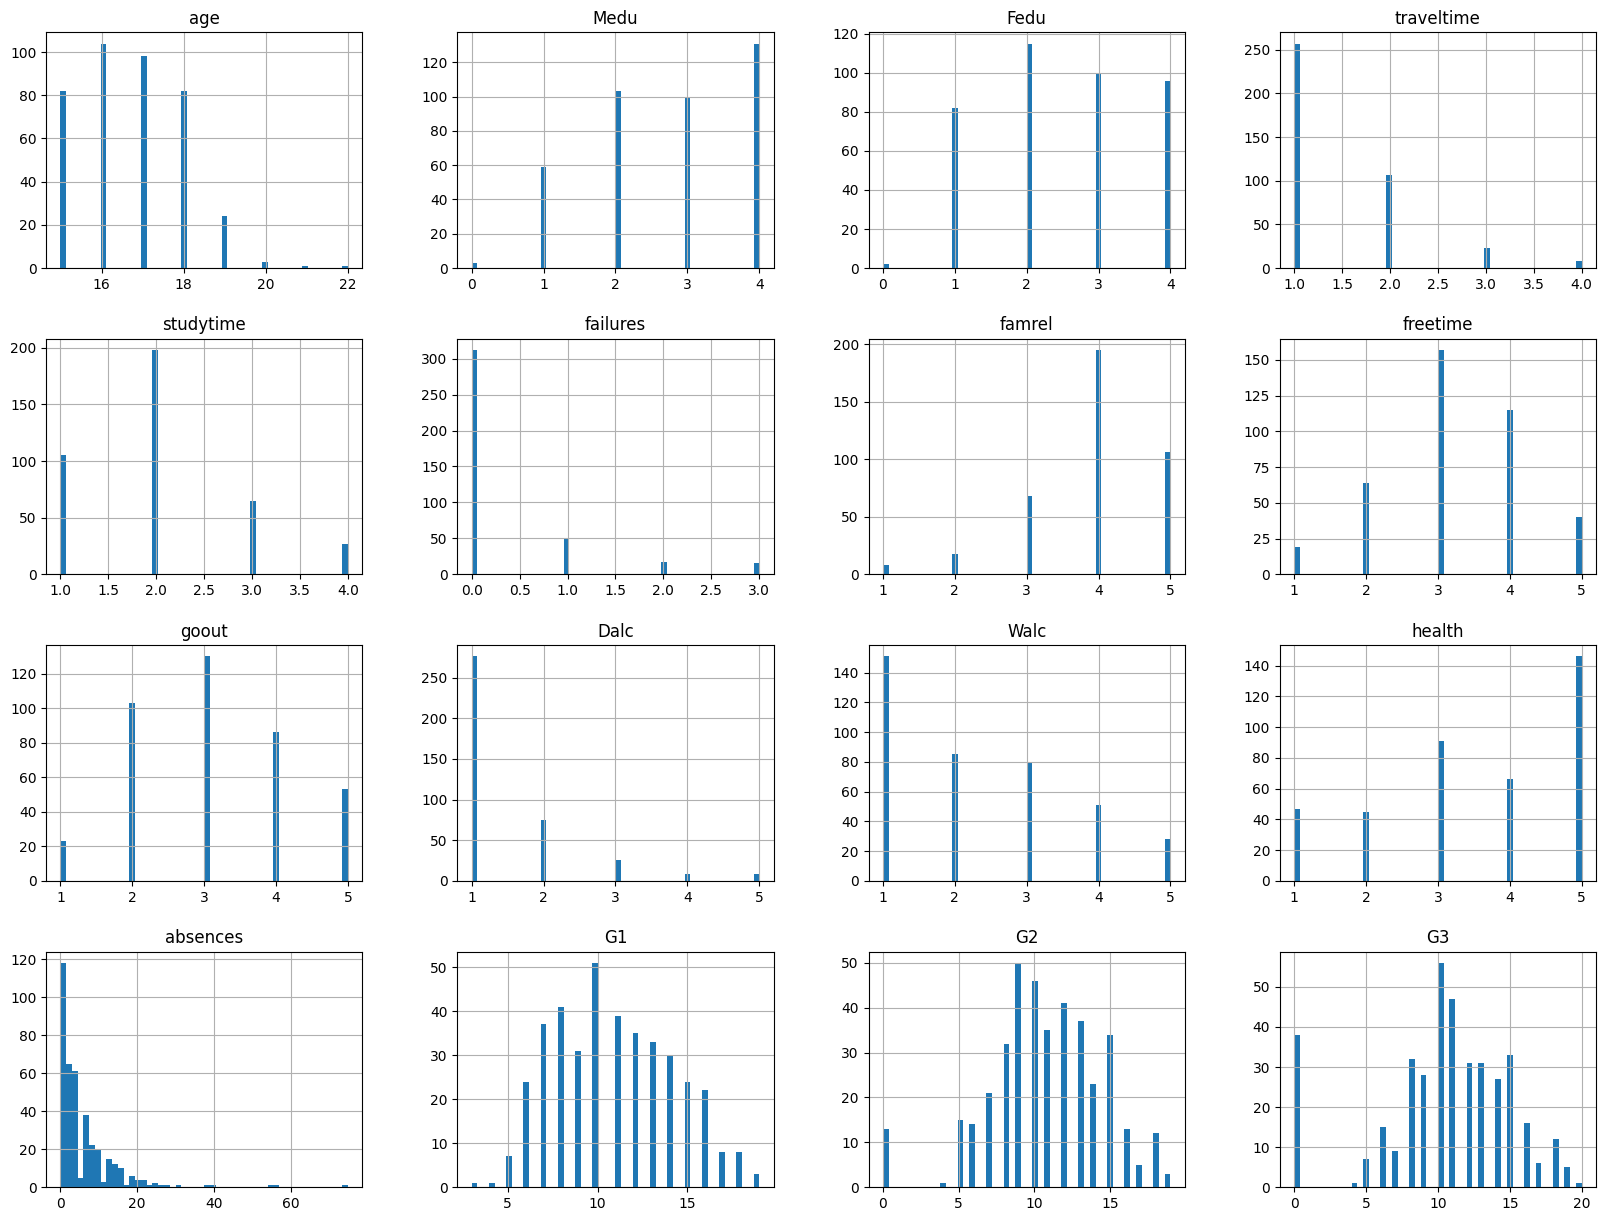

In [14]:

import matplotlib.pyplot as plt
df_student.hist(bins=50, figsize=(20,15))
plt.show()


Observation

1. The age column has a min age of 15 and a max age of 22 , it must be an outlier, it is a bit unusual for a student dataset maybe it includes students who have skipped grades

2. The absences column has a max value of 75 , which is quite high . This must be an outlier

3. Categorical columns are of object data type , which require further encoding before they will be used in the machine learning model

Feature Engineering

In [15]:
corr_matrix = df_student.corr(numeric_only='int')
corr_matrix['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

In [16]:
# Drop the following columns that are not useful for analysis
#    job - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
#    Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
#    reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
#    guardian - student's guardian (nominal: "mother", "father" or "other")
#    nursery - attended nursery school (binary: yes or no)

df_student.drop(['Mjob', 'Fjob', 'reason', 'guardian', 'nursery'], axis=1, inplace=True)

In [17]:
# Performing one hot encoding to the categerical data

df_student = pd.get_dummies(df_student, columns=['school', 'sex', 'address', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic'], drop_first=True)

In [18]:
# Perform label encoding on ordinal columns i.e., famsize
le = LabelEncoder()

df_student['famsize'] = le.fit_transform(df_student['famsize'])
print(le.classes_, df_student['famsize'].value_counts())

['GT3' 'LE3'] famsize
0    281
1    114
Name: count, dtype: int64


EDA

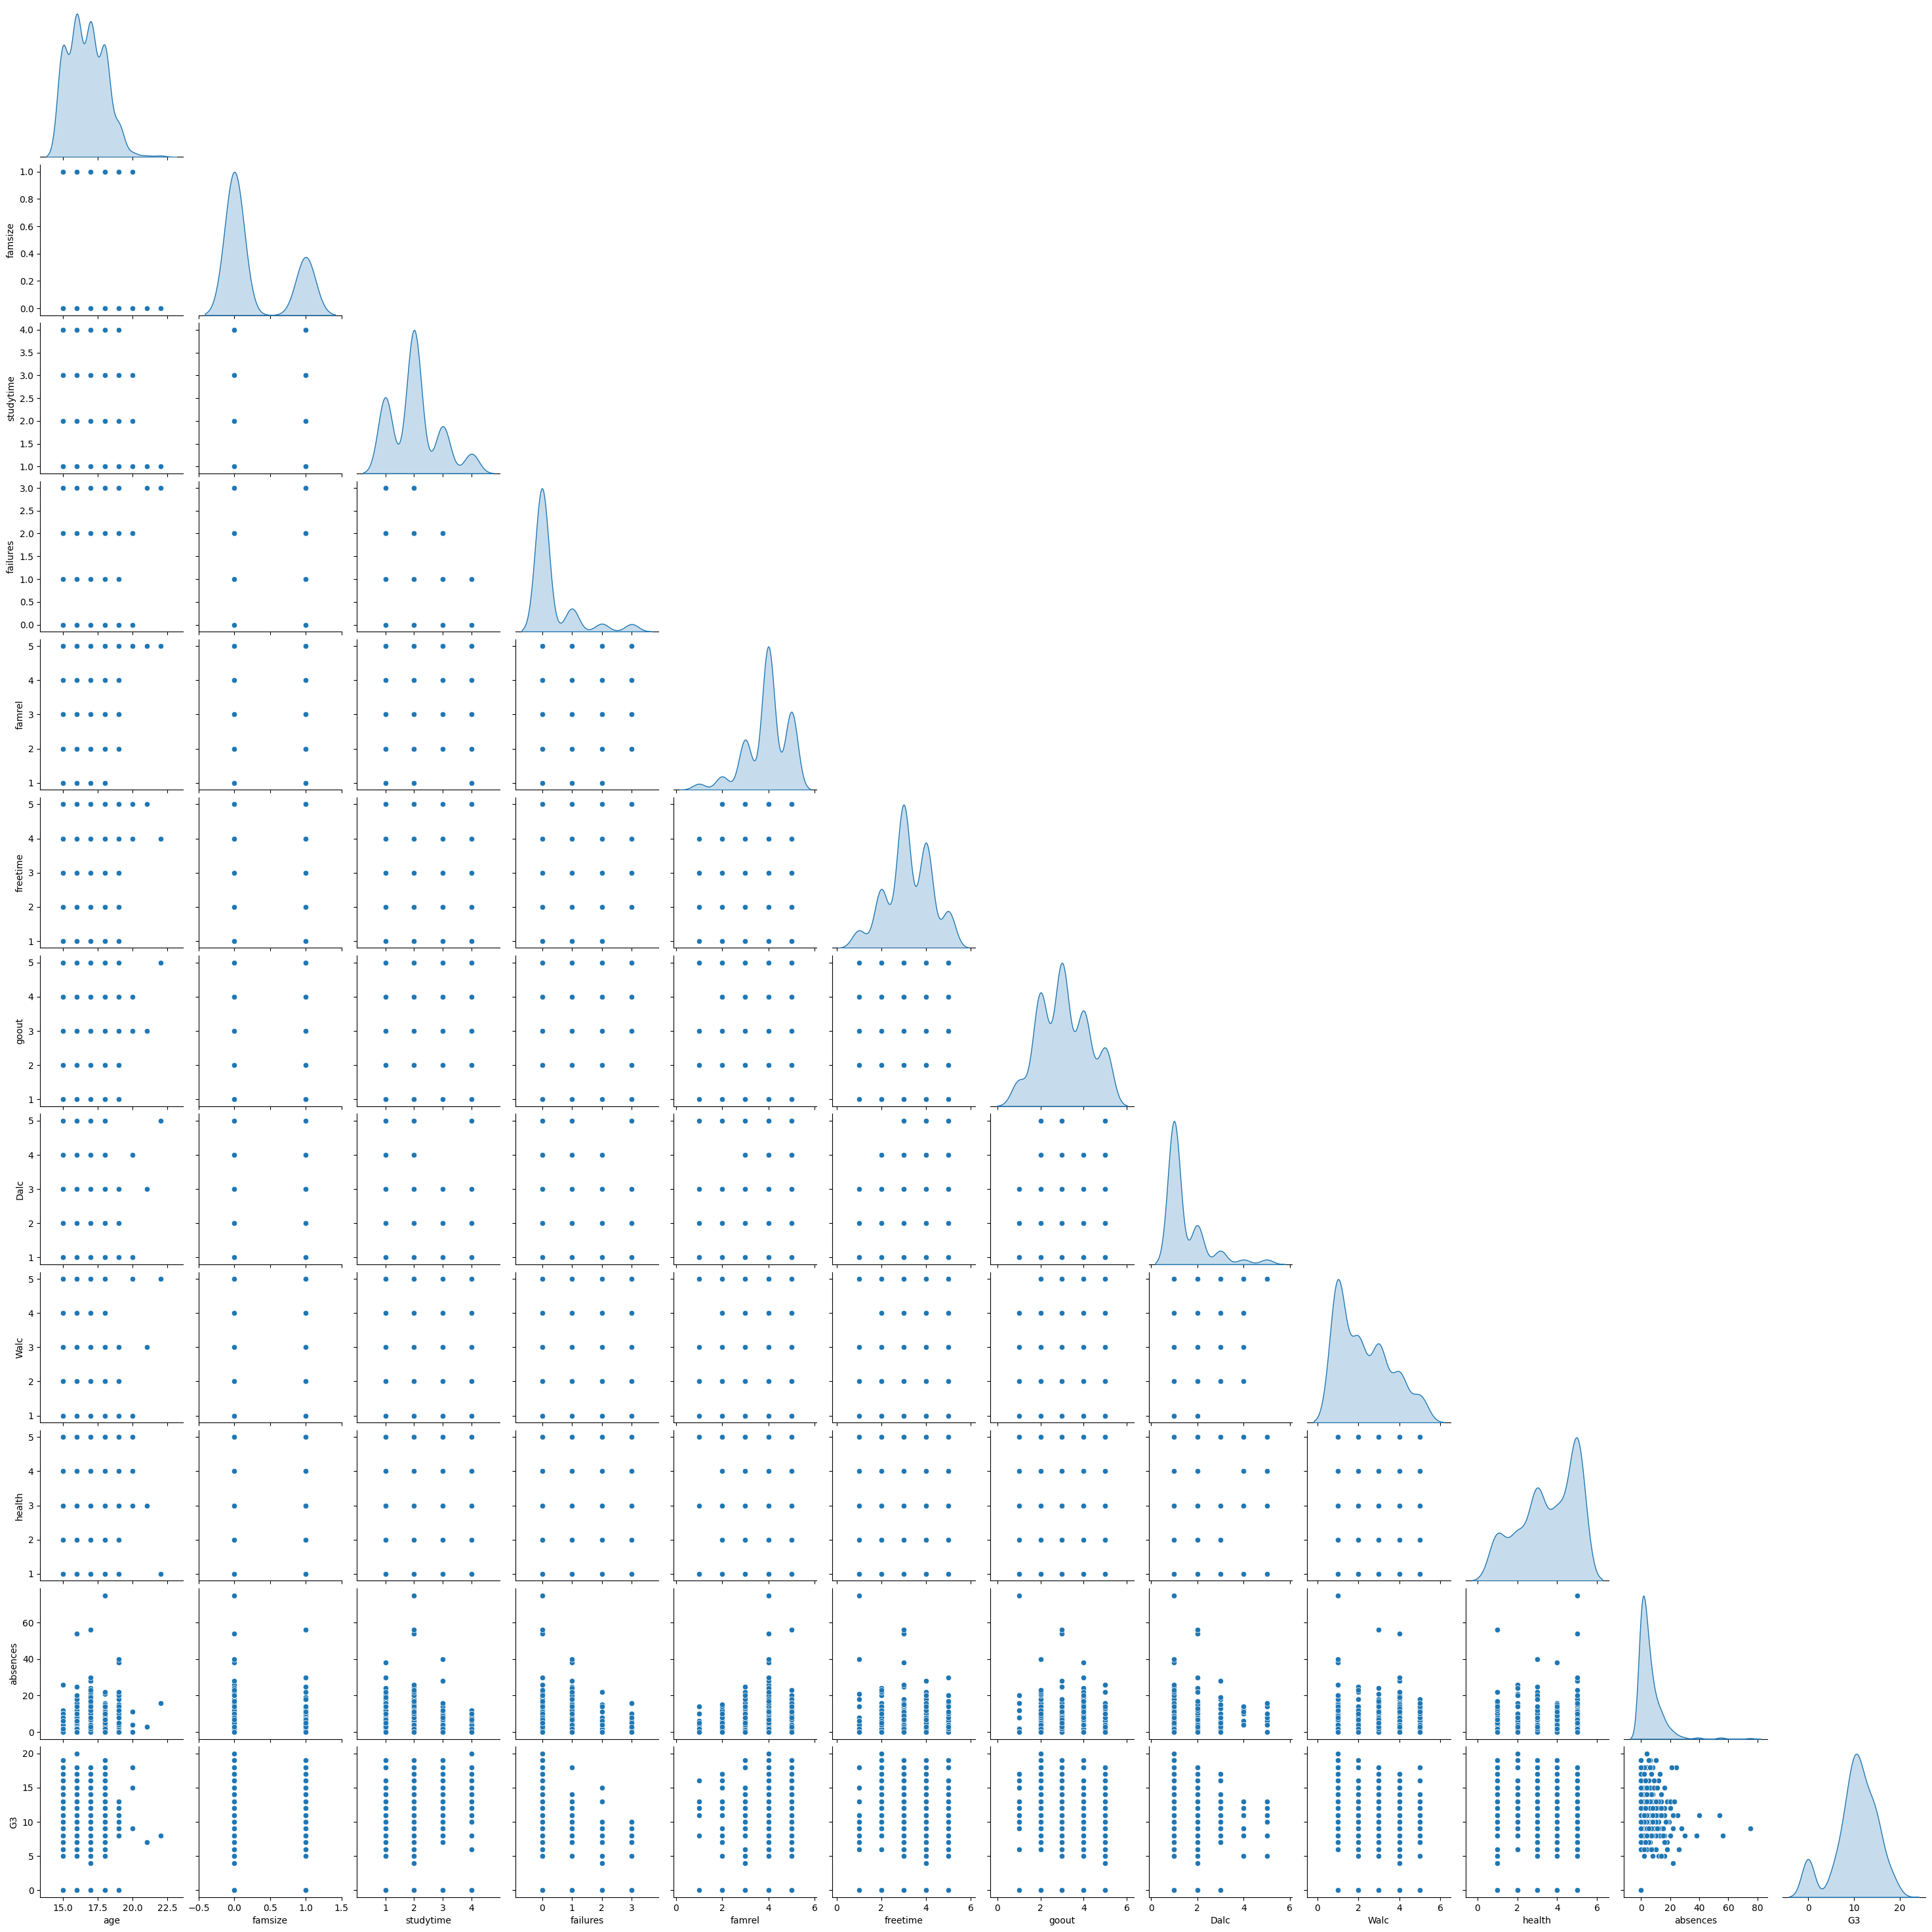

In [19]:
sns.pairplot(df_student[['age', 'famsize', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']], diag_kind='kde', corner=True)

<Axes: >

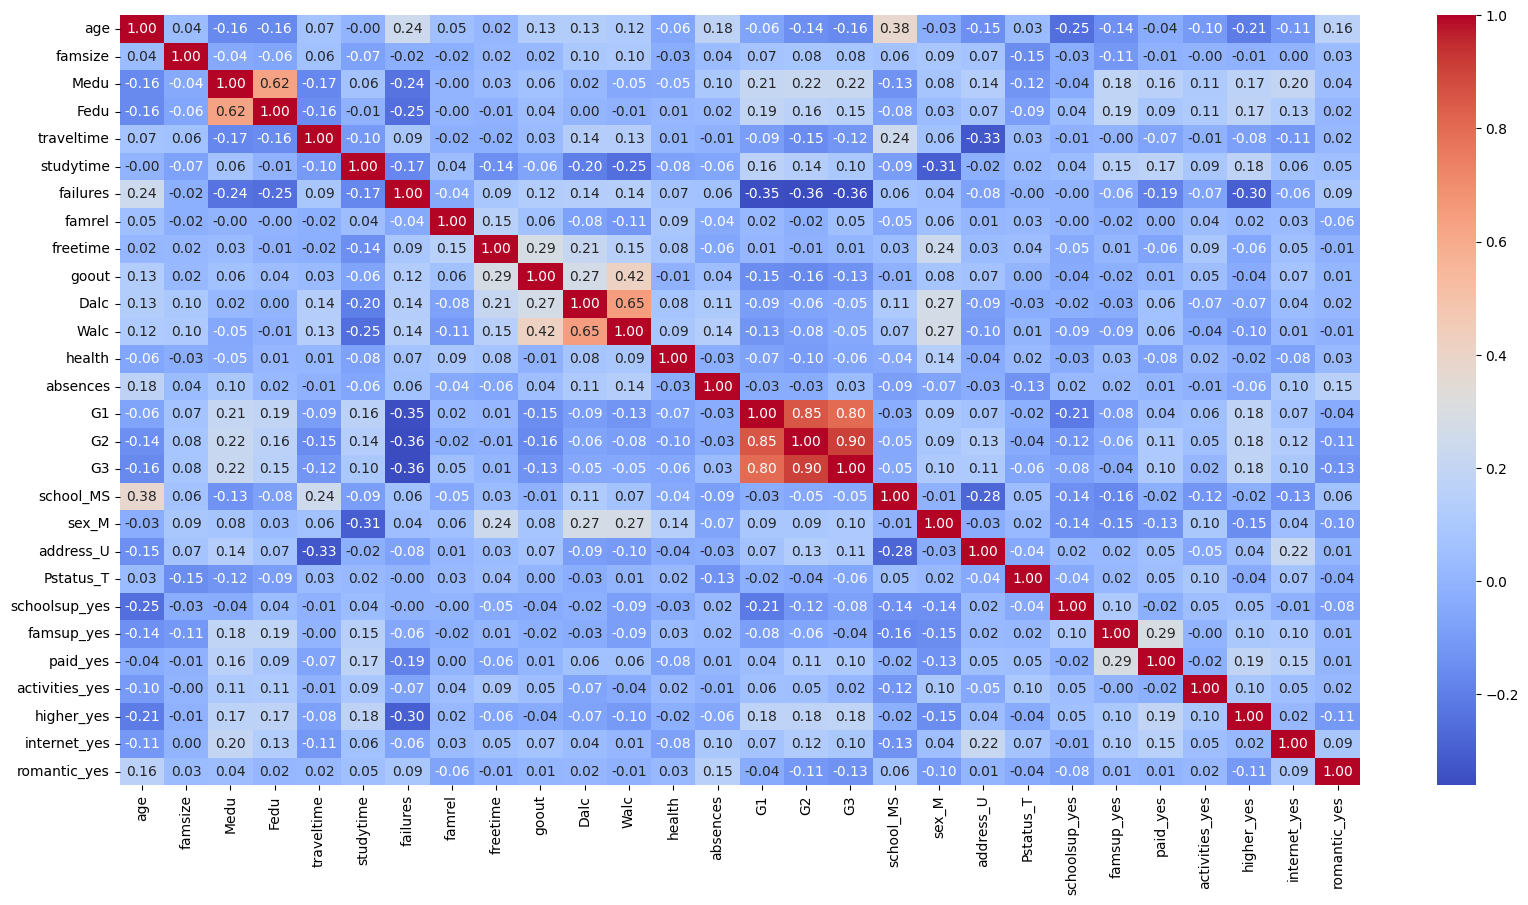

In [20]:
# lets generate a correlation heatmap for the data
plt.figure(figsize=(20, 10))
sns.heatmap(df_student.corr(), annot=True, fmt='.2f', cmap='coolwarm')

According to the correlation heatmap, the following features have a strong correlation with the target variable 'G3':

age - students' age might affect their final grades in terms of maturity and learning ability

Medu - mother with higher education might have a positive impact on students' final grades

Fedu - father with higher education might have a positive impact on students' final grades

traveltime - shorter travel time might help students to focus on their studies

studytime - more study time might help students to get better grades

failures - students with fewer failures might have better grades

goout - students who go out less might have better grades

address_U - living in urban area might have a positive impact on students' final grades

paid_yes - students who take extra paid classes might have better grades

higher_yes - students who want to pursue higher education might have better grades

internet_yes - students with internet access have a better chance of accessing online resources

romantic_yes - students in a romantic relationship might have lower grades

Lets split the dataset 

In [21]:
# Define X and y
X = df_student[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'goout', 'address_U', 'paid_yes', 'higher_yes', 'internet_yes', 'romantic_yes' , 'G1' , 'G2', 'absences']]
y = df_student['G3']

# Split the data into train and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling the dataset

In [22]:

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Modelling of training data

In [23]:
models = [LinearRegression(), RandomForestRegressor(), Lasso(), Ridge(), ElasticNet(), DecisionTreeRegressor(), GradientBoostingRegressor() , SVR(), LinearSVR() , SGDRegressor()]
model_names = ['Linear Regression', 'Random Forest Regressor', 'Lasso', 'Ridge', 'ElasticNet', 'DecisionTreeRegressor', 'GradientBoostingRegressor',' SVR' , 'LinearSVR' , 'SGDRegressor'] 
kf = KFold(n_splits=10, shuffle=True, random_state=42)

Evaluatng the cross validation score of each model

LinearRegression - MSE: 3.65
RandomForestRegressor - MSE: 2.76
Lasso - MSE: 21.18
Ridge - MSE: 3.78
ElasticNet - MSE: 19.40
DecisionTreeRegressor - MSE: 4.60
GradientBoostingRegressor - MSE: 2.76
SVR - MSE: 7.56
LinearSVR - MSE: 4.17
SGDRegressor - MSE: 4.18


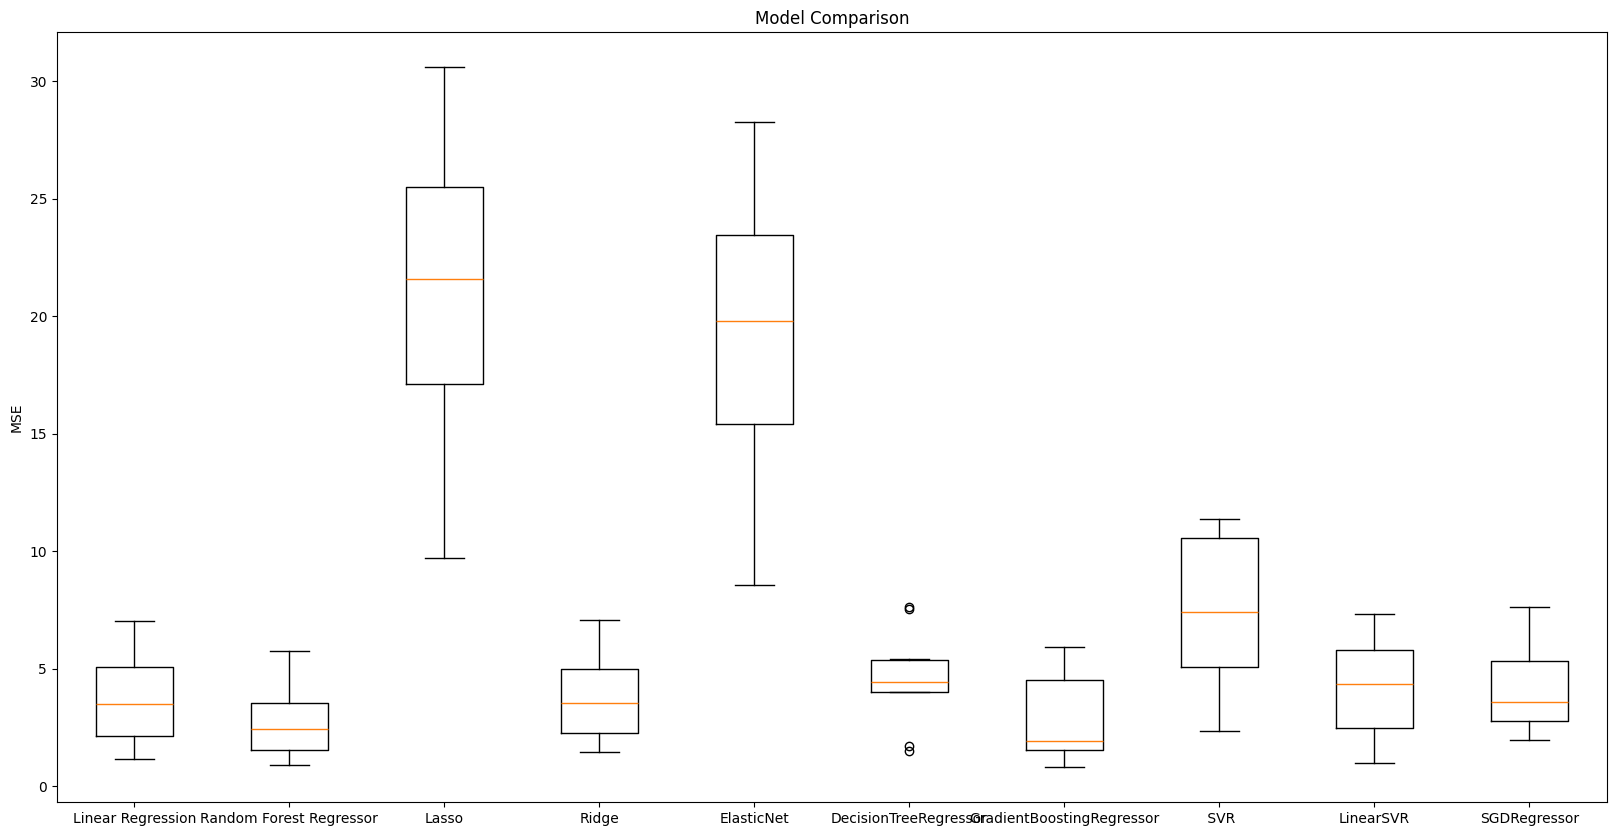

In [24]:
results = []

for model in models:
    model_name = model.__class__.__name__
    cv_result = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_result = -1 * cv_result # Convert the negative MSE to positive
    results.append(cv_result)
    print(f'{model_name} - MSE: {np.mean(cv_result):.2f}')

# Plot the results of the models, to compare the performance
plt.figure(figsize=(20, 10))
plt.boxplot(results, labels=model_names)
plt.title('Model Comparison')
plt.ylabel('MSE')
plt.show()

As we have tested soo many regression models , we get the lowest MSE with the Random forest regression model , Therefore we will use this model to predict the final grades of students

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

random_forest = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist,
    n_iter=20,                
    cv=5,                     
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

rf_random_search.fit(X_train_scaled, y_train)

print("Best parameters:", rf_random_search.best_params_)
print("Best score (MSE):", -rf_random_search.best_score_)

Best parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Best score (MSE): 3.549629607997134


In [39]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_scaled , y_train)
y_pred = random_forest.predict(X_train_scaled)
print("The MSE of forest regressor is :" , (mean_squared_error(y_train , y_pred)))

The MSE of forest regressor is : 0.35457594936708864


In [40]:
# Predict the test set

y_pred = random_forest.predict(X_test_scaled)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Average MSE: {mse:.2f}')

# Print the actual and predicted values along with the MSE, randomly sample 10 rows
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.astype(int)})
df['MSE'] =  (df['Actual'] - df['Predicted']) ** 2
df.sample(10)



Average MSE: 3.60


,Actual,Predicted,MSE
334,0,6,36
77,11,10,1
375,10,8,4
56,15,15,0
304,13,14,1
289,15,13,4
94,14,12,4
9,15,15,0
390,9,9,0
3,15,14,1


R² score: 0.82


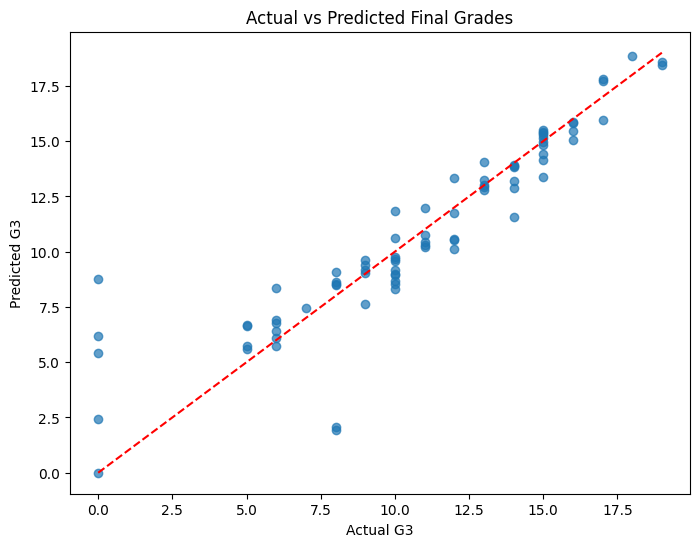

In [41]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2:.2f}')

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs Predicted Final Grades')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()